# Mor then 15-plots in plotly

In [1]:
# import linbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# import dataset
df = sns.load_dataset('iris')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# 1. Scatter plot

In [5]:
fig1 = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
fig1.show()
# save the plot 
fig1.write_image('./output/fig1.png', scale=3)

# 2. Line Plot

In [6]:
# sort the values
df_line = df.sort_values(by=['sepal_length'])
fig2 = px.line(df_line, x='sepal_length', y='sepal_width', color='species')

fig2.show()

# save the plot in png
fig2.write_image('./output/fig2.png', scale=3)


# 3. Bar plot

In [7]:
# group values based on means
df_bar = df.groupby(['species']).mean().reset_index()
df_bar.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [8]:


fig3 = px.bar(df_bar, x='species', y='sepal_width')
fig3.show()
# save the plot in png file
fig3.write_image('./output/fig3.png', scale=3)


<Axes: xlabel='species', ylabel='sepal_length'>

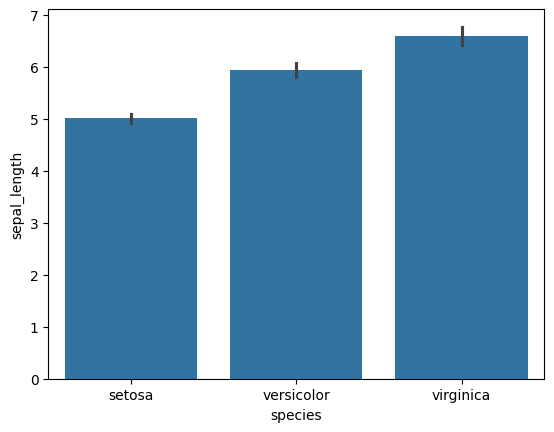

In [9]:
# seaborn dose not need to make mean group
sns.barplot(df, x='species', y='sepal_length')

# 4. Box plot

In [10]:
fig4 = px.box(df, x='species', y='sepal_width', color='species')
fig4.show()

# save the plot in png file
fig4.write_image('./output/fig4.png', scale=3)

# 5. Violin plot

In [11]:
fig5 = px.violin(df, x='species', y='sepal_width', color='species', box=True)
fig5.show()

# save the plot in png file
fig5.write_image('./output/fig5.png', scale=3)



# 6. Histogram

In [12]:
fig6 = px.histogram(df, x='sepal_width', color='species')
fig6.show()

# save the plot in png file
fig6.write_image('./output/fig6.png', scale=3)

# 7. Pie chart

In [13]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [14]:
df_pie = df['species'].value_counts().reset_index()
df_pie.columns = ['species', 'count']
fig7 = px.pie(df_pie, values='count', names='species')
fig7.show()

# save the plot in png file
fig7.write_image('./output/fig7.png', scale=3)

# 8. Scatter 3d plot

In [15]:
fig8 = px.scatter_3d(df, x='sepal_length', y='petal_width', z='sepal_width', color='species')
fig8.show()

# save the plot in html file
fig8.write_html('./output/fig8.html')


# 9. Area chart

In [16]:
df_area = df.sort_values(by=['sepal_length'])

In [17]:
fig9 = px.area(df_area,x='sepal_width', y='sepal_length', color='species' )
fig9.show()

# save the plot in png file
fig9.write_image('./output/fig9.png', scale=3)

# 10. Bubble chart

In [18]:
fig10 = px.scatter(df, x='sepal_length', y='sepal_width', size='petal_length', color='species')
fig10.show()

# save the plot in png file
fig10.write_image('./output/fig10.png', scale=3)

In [19]:
# 11. Sunburst chart
df_sunburst = df.groupby(['species', 'petal_width']).size().reset_index(name='counts')


fig11 = px.sunburst(df_sunburst, path=['species', 'petal_width'], values='counts')

fig11.show()
# save the plot in html file
fig11.write_html('./output/fig11.html')

# save the plot in png file
fig11.write_image('./output/fig11.png', scale=3)


# 12. Parallal coordinate plot

In [20]:
pip install plotly.express

In [21]:
# import linbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [22]:
# import dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
# Add a numaric species_id based on species names for coloring
df['species_id'] = df['species'].astype('category').cat.codes

# Parallel plot
fig12 = px.parallel_coordinates(df, color='species_id', labels={'species_id': 'species'}, color_continuous_scale=px.colors.diverging.Tealrose)
fig12.show()


# 13. Dansty contour plot

In [24]:
fig13 = px.density_contour(df, x='sepal_length', y='sepal_width', color='species')
fig13.show()

# save the plot in png file
fig13.write_image('./output/fig13.png', scale=3)

# 14. ternary plot

In [25]:
fig14 = px.scatter_ternary(df, a='sepal_length', b='sepal_width', c='petal_width', color='species')
fig14.show()


# save the plot in png file
fig14.write_image('./output/fig14.png', scale=3)


# 15. Polar chart (radar chart)

In [41]:
# Importing libraries
import plotly.express as px

# using the iris dataset
df = px.data.iris()
# create Polar or Radar chart
fig15 = px.line_polar(df, r='sepal_length',
                    theta='species',
                    line_close=True)
# Show the plot
fig15.show()


# 16. 3D surface plot

### A 3D surface plot visualizes three-dimensional data by representing relationships between three continuous variables. Each axis of the plot corresponds to one of the variables, while the surface height and color variations depict value changes. It’s especially useful for understanding complex datasets and exploring topographical patterns, such as peaks and valleys, in the data landscape.

In [30]:
# import the required module
import plotly.graph_objects as go
import numpy as np


# creat a dummy data
x = np.linspace(-5,5,50) # create an array of 50 evenly spaced values between -5 and 5
y = np.linspace(-5,5,50) # create an array of 50 evenly spaced values between -5 and 5
X,Y = np.meshgrid(x,y) # create a grid of x and y values
Z = np.sin(np.sqrt(X**2 + Y**2)) # calculate the value of z for each point on the grid

# Create a surface plot
fig16 = go.Figure(data=[go.Surface(z=Z)]) # create a surface plot using the calculated z values
fig16.show() # display the plot

# save the plot in html file
fig16.write_html('./output/fig16.html')

# 17. Geographical map

### Geo maps, also known as choropleth maps, are a type of map that displays data using different colors or shades to represent different values or levels of a variable across different geographic regions. In a geo map, each region is represented as a polygon or shape, with the color or shade of the polygon determined by the value of the variable being plotted. Geo maps are useful for visualizing the distribution of data across different geographic regions, such as countries, states, or election districts. They are commonly used in data analysis, reporting, and visualization.

In [33]:
# import the necessary libraries
import plotly.express as px

# load the sample election data
df = px.data.election()

# load the geojson file for the election districts
geojson = px.data.election_geojson()

# create a choropleth map using plotly
fig17 = px.choropleth_mapbox(df, geojson=geojson, color="Coderre",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)

# update the layout of the map
fig17.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# display the map
fig17.show()

# save the plot in html file
fig17.write_html('./output/fig17.html')

# 18. Animated GEO Map in plotly

### We can also create the animated plots with plotly using express module.

### The purpose of this code is to create a choropleth map using Plotly Express to visualize the global population by country over time.

In [35]:
# import the necessary libraries
import pandas as pd
import plotly.express as px

# load the population data from a csv file hosted on GitHub
df = pd.read_csv('https://raw.githubusercontent.com/datasets/population/main/data/population.csv')

# create a choropleth map using plotly
fig18 = px.choropleth(df, locations='Country Name', locationmode='country names', color = 'Value',
                    animation_frame='Year', range_color=[100000, 50000000],
                    color_continuous_scale='portland',
                    title='Global Population by Country')

# display the map
fig18.show()

# save the plot in html file
fig18.write_html('./output/fig18.html')

# 19. Saving plots as .gif file

### Saving the plotly animated plot as gif file can be done as follows:

In [36]:
# import the necessary libraries
import plotly.express as px
import pandas as pd
import numpy as np
import io
import PIL

# load the population data from a csv file hosted on GitHub
df = pd.read_csv('https://raw.githubusercontent.com/datasets/population/main/data/population.csv')

# create a choropleth map using plotly
fig = px.choropleth(df, locations='Country Name', locationmode='country names', color = 'Value',
                    animation_frame='Year', range_color=[100000, 50000000],
                    color_continuous_scale='portland',
                    title='Global Population by Country')

# save the animated map as a gif file

# generate images for each step in animation
frames = []
for s, fr in enumerate(fig.frames):
    # set main traces to appropriate traces within plotly frame
    fig.update(data=fr.data)
    # move slider to correct place
    fig.layout.sliders[0].update(active=s)
    # generate image of current state
    frames.append(PIL.Image.open(io.BytesIO(fig.to_image(format="png", scale=2))))

# create animated GIF
frames[0].save(
        "world_population_in_recent_years.gif",
        save_all=True,
        append_images=frames[1:],
        optimize=True,
        duration=500, # milliseconds per frame
        loop=0, # infinite loop
        dither=None  # Turn off dithering
    )

# 19. Animated bubble chart

In [37]:
# import the necessary libraries
import plotly.express as px
import pandas as pd
import numpy as np
import io
import PIL

# load the gapminder data from plotly
df = px.data.gapminder()

# create a choropleth map using plotly
fig19 = px.scatter(df, x= "gdpPercap",
            y = "lifeExp",
            size= "pop", color= "continent",
            animation_frame='year', animation_group="country",
            log_x=True, size_max=55, range_x=[100,100000], range_y=[5,100])


# save the animated plot as a gif file

# generate images for each step in animation
frames = []
for s, fr in enumerate(fig19.frames):
    # set main traces to appropriate traces within plotly frame
    fig19.update(data=fr.data)
    # move slider to correct place
    fig19.layout.sliders[0].update(active=s)
    # generate image of current state
    frames.append(PIL.Image.open(io.BytesIO(fig19.to_image(format="png", scale=1))))

# create animated GIF
frames[0].save(
        "Animated Bubble Plot using plotly.gif",
        save_all=True,
        append_images=frames[1:],
        optimize=True,
        duration=500, # milliseconds per frame
        loop=0, # infinite loop
        dither=None  # Turn off dithering
    )

# 20. Add drop down button in plotly

In [42]:
import plotly.graph_objects as px
import numpy as np


# creating random data through randomint
# function of numpy.random
np.random.seed(42)

# Data to be Plotted
random_x = np.random.randint(1, 101, 100)
random_y = np.random.randint(1, 101, 100)

plot = px.Figure(data=[px.Scatter(
    x=random_x,
    y=random_y,
    mode='markers',)
])

# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
            direction="down",
        ),
    ]
)

plot.show()

# 21. Add buttons

In [43]:
import plotly.graph_objects as px
import pandas as pd
import seaborn as sns

# reading the database
data = sns.load_dataset('tips')


plot = px.Figure(data=[px.Scatter(
    x=data['day'],
    y=data['tip'],
    mode='markers',)
])

# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
        ),
    ]
)

plot.show()